# Unsupervised Learning, Anomaly Detection, and Temporal Analysis | Assignment Solution

This notebook contains the complete answers for Assignment Code **DA-AG-011**, covering Dimensionality Reduction, Clustering, Anomaly Detection, and Time Series Analysis.

## Question 1: What is Dimensionality Reduction? Why is it important in machine learning?

**Dimensionality Reduction** is the process of reducing the number of input variables (features) in a dataset while retaining as much of the relevant information as possible. It transforms high-dimensional data into a lower-dimensional space (e.g., 2D or 3D).

**Importance in Machine Learning:**
1.  **Mitigates the Curse of Dimensionality:** High-dimensional data requires exponentially more data to generalize well. Reducing dimensions helps avoid overfitting.
2.  **Improves Computational Efficiency:** Fewer features mean less data to process, leading to faster training and inference times.
3.  **Visualization:** It allows complex, high-dimensional data to be visualized in 2D or 3D plots, making it easier to identify patterns and clusters.
4.  **Noise Reduction:** By keeping only the most important features (principal components), it often filters out noise and redundant data.

## Question 2: Name and briefly describe three common dimensionality reduction techniques.

1.  **Principal Component Analysis (PCA):** A linear technique that projects data onto orthogonal axes (principal components) maximizing the variance (information) in the data. It is widely used for noise reduction and visualization.
2.  **t-Distributed Stochastic Neighbor Embedding (t-SNE):** A non-linear probabilistic technique primarily used for visualizing high-dimensional data. It works by preserving the local structure of data, keeping similar instances close together in the lower-dimensional space.
3.  **Linear Discriminant Analysis (LDA):** A supervised dimensionality reduction technique. Unlike PCA which focuses on variance, LDA focuses on maximizing the separability between known categories (classes), making it very useful for classification tasks.

## Question 3: What is clustering in unsupervised learning? Mention three popular clustering algorithms.

**Clustering** is an unsupervised learning task that involves grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other (in some sense) than to those in other groups.

**Three Popular Algorithms:**
1.  **K-Means Clustering:** Partitioning method that divides data into $K$ distinct, non-overlapping subgroups by minimizing the distance between data points and the cluster centroid.
2.  **Hierarchical Clustering:** Builds a hierarchy of clusters either by merging smaller clusters (agglomerative) or splitting larger ones (divisive), often visualized using a dendrogram.
3.  **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** Groups points that are closely packed together (high density) and marks points that lie alone in low-density regions as outliers (noise). It can find arbitrarily shaped clusters.

## Question 4: Explain the concept of anomaly detection and its significance.

**Anomaly Detection** (or outlier detection) is the identification of rare items, events, or observations which raise suspicions by differing significantly from the majority of the data.

**Significance:**
* **Fraud Detection:** Identifying unusual credit card transactions that may indicate theft.
* **System Health Monitoring:** Detecting abnormal readings in server logs or manufacturing sensors that predict system failure or defects.
* **Network Security:** Spotting malicious activity or intrusion attempts by analyzing network traffic patterns.

## Question 5: List and briefly describe three types of anomaly detection techniques.

1.  **Statistical Methods (e.g., Z-Score):** Assumes the data follows a known distribution (like Gaussian). Data points that deviate significantly (e.g., > 3 standard deviations) from the mean are flagged as anomalies.
2.  **Isolation Forest:** A tree-based algorithm that works on the principle that anomalies are few and different. It isolates anomalies by randomly selecting a feature and a split value; anomalies are isolated much quicker (shallower tree depth) than normal points.
3.  **Density-Based Methods (e.g., Local Outlier Factor - LOF):** Detects anomalies by comparing the local density of a point to the local densities of its neighbors. Points that have a substantially lower density than their neighbors are considered outliers.

## Question 6: What is time series analysis? Mention two key components of time series data.

**Time Series Analysis** involves analyzing a sequence of data points collected or recorded at specific time intervals to identify meaningful characteristics, patterns, and trends, often for the purpose of forecasting future values.

**Two Key Components:**
1.  **Trend:** The long-term movement or direction in the data (increasing, decreasing, or stable over time).
2.  **Seasonality:** Repeating variations or patterns that occur at specific regular intervals (e.g., increased sales every December, higher temperature every summer).

## Question 7: Describe the difference between seasonality and cyclic behavior in time series.

| Feature | Seasonality | Cyclic Behavior |
| :--- | :--- | :--- |
| **Frequency** | **Fixed and Known.** The pattern repeats at specific intervals (e.g., daily, weekly, yearly). | **Variable and Unknown.** The fluctuations do not have a fixed period. |
| **Cause** | Driven by calendar or clock factors (e.g., seasons, holidays, day/night). | Driven by economic or business conditions (e.g., business cycles, recessions). |
| **Duration** | Usually covers a fixed time span (e.g., 12 months). | Can last for multiple years (e.g., an economic boom might last 5 years). |

## Question 8: Write Python code to perform K-means clustering on a sample dataset.

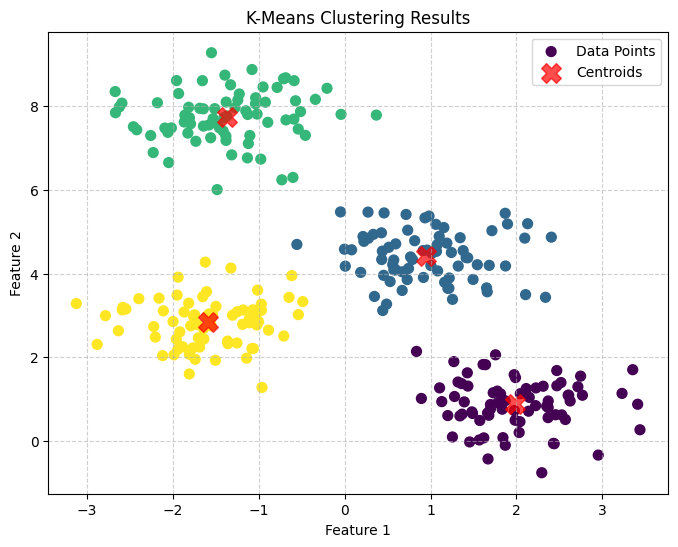

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate Sample Data
# Creating a synthetic dataset with 300 points and 4 distinct centers (clusters)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Initialize and Fit K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# 3. Visualize the Results
plt.figure(figsize=(8, 6))

# Plot the data points color-coded by their predicted cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')

# Plot the cluster centers (centroids)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Question 9: What is inheritance in OOP? Provide a simple example in Python.

**Inheritance** is a fundamental concept in Object-Oriented Programming (OOP) where a new class (called the **Child** or **Subclass**) derives attributes and methods from an existing class (called the **Parent** or **Superclass**).

It promotes **code reusability**—you don't have to rewrite the code for shared functionality—and establishes a natural hierarchy.

In [3]:
# Parent Class
class Animal:
    def speak(self):
        print("Generic Animal Sound")

# Child Class inheriting from Animal
class Dog(Animal):
    def speak(self):
        # Overriding the parent method
        print("Woof! Woof!")

# Creating instances
generic_animal = Animal()
my_dog = Dog()

generic_animal.speak()  # Output: Generic Animal Sound
my_dog.speak()          # Output: Woof! Woof! (Inheritance allows Dog to be an Animal, but Polymorphism lets it speak differently)

Generic Animal Sound
Woof! Woof!


## Question 10: How can time series analysis be used for anomaly detection?

Time series analysis detects anomalies by establishing a "normal" baseline of behavior over time and flagging significant deviations from it.

**The Process:**
1.  **Forecasting:** A model (like ARIMA or LSTM) is trained on historical data to predict future values (expected behavior).
2.  **Residual Calculation:** The difference between the *actual observed value* and the *predicted value* is calculated. This difference is called the residual or error.
3.  **Thresholding:** If the residual exceeds a predefined threshold (e.g., 3 standard deviations from the mean error), the data point is flagged as an anomaly.

This is particularly useful for detecting sudden spikes in web traffic, unexpected drops in revenue, or sensor malfunctions in machinery.